# Tag with lambda SARSA

Lets take a look at the $\lambda$-SARSA agent performance on the tag problem. As usual we will train it against some random agents, and against another $\lambda$-SARSA agent to see how things go.

We will just look how episodes duration evolve over a single training round, and we will use a moving average to make things visible.

In terms of behaviour $\lambda$-SARSA and SARSA are suposed to be similar. The advantage of $\lambda$-SARSA should be on a more efficeint learning procedure in terms of data usage, so lets see if at least we can get similar result with shorter training rounds.

In [1]:
import sys

sys.path.append("../..")

from grid_world.grid_world import GridWorld
from grid_world.visualization.format_objects import get_world_str
from utils.returns import returns_from_reward
from notebooks.utils.basics import basic_actions, basic_tag_reward
from exploring_agents import LambdaSarsaAgent, RandomAgent
from notebooks.utils.experimentation import moving_average
from exploring_agents.training import train_tag_agents
from notebooks.utils.worlds import tagging_world_01
from grid_world.action import GWorldAction

import matplotlib.pyplot as plt
import numpy as np

np.random.seed(50)

In [2]:
gworld = tagging_world_01
print(get_world_str(gworld))

5                ⚐ 

4                  

3       █  █       

2       █          

1 █  █  █          

0 ⚐                

  0  1  2  3  4  5 


## Sarsa vs Random

Ok, now lets see how a SARSA agent performs against a random one. Both trying to catch, and to run.

In [3]:
random_agent = RandomAgent(
    reward_function=basic_tag_reward,
    actions=basic_actions,
    gamma=0.9,
)

agent_1 = LambdaSarsaAgent(
    reward_function=basic_tag_reward,
    actions=basic_actions,
    gamma=0.9,
    alpha=0.3,
    epsilon=0.01,
    et_lambda=0.3,
)

episode_lengths, agent_1_returns, agent_2_returns = train_tag_agents(
    agent_1=agent_1,
    agent_2=random_agent,
    world=gworld,
    episodes=int(1e3),
    episode_max_length=200,
)

In [4]:
print(
    f"Agent 1 wins {np.sum([x > 0 for x in agent_1_returns])/len(agent_1_returns):.3f} of episodes, with {np.mean(episode_lengths):.2f} average steps"
)

Agent 1 wins 0.969 of episodes, with 55.28 average steps


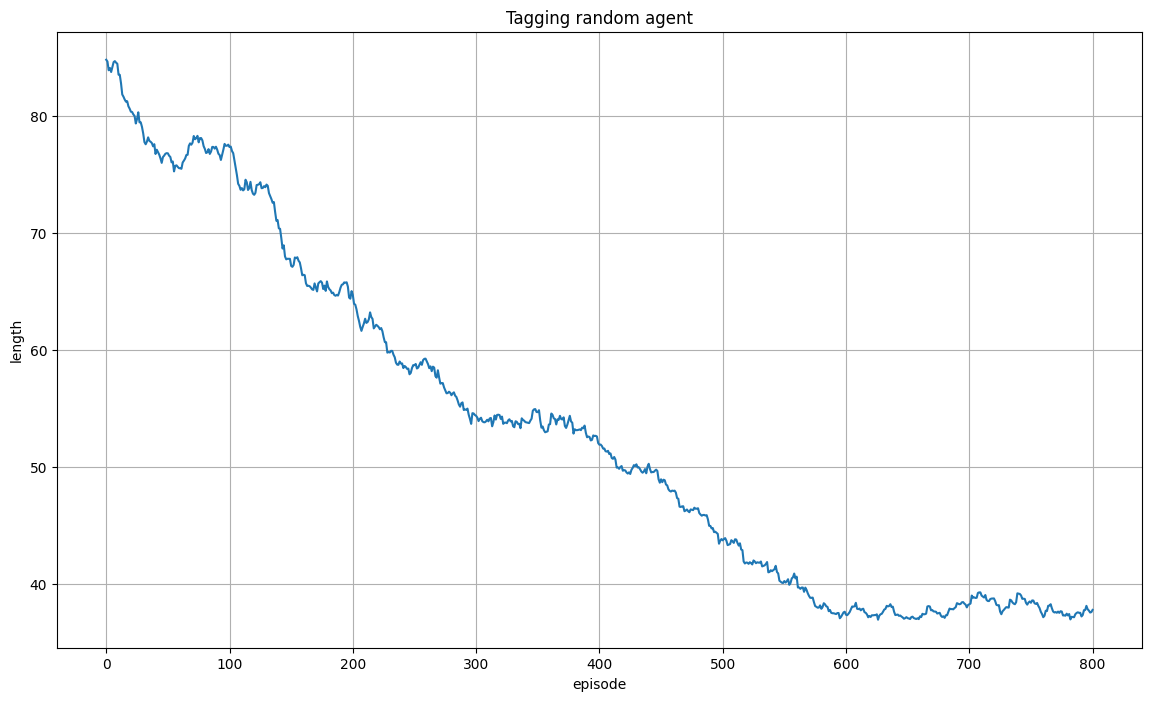

In [5]:
fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(
    moving_average(np.array(episode_lengths), 200),
)

ax.set(xlabel="episode", ylabel="length")
ax.grid()
ax.set_title("Tagging random agent")


plt.show()

In [6]:
agent_2 = LambdaSarsaAgent(
    reward_function=basic_tag_reward,
    actions=basic_actions,
    gamma=0.9,
    alpha=0.3,
    epsilon=0.01,
    et_lambda=0.3,
)

episode_lengths, agent_1_returns, agent_2_returns = train_tag_agents(
    agent_1=random_agent,
    agent_2=agent_2,
    world=gworld,
    episodes=int(1e3),
    episode_max_length=200,
)

In [7]:
print(
    f"Agent 2 wins {np.sum([x > 0 for x in agent_2_returns])/len(agent_2_returns):.3f} of episodes, with {np.mean(episode_lengths):.2f} average steps"
)

Agent 2 wins 0.850 of episodes, with 189.42 average steps


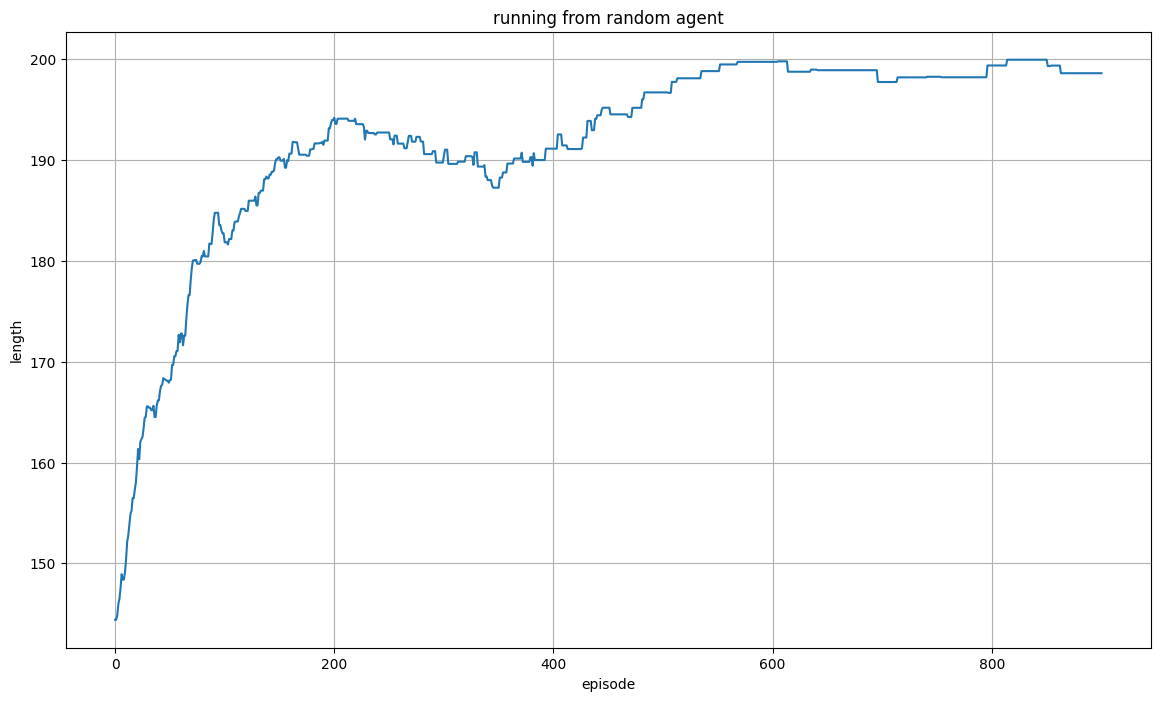

In [8]:
fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(
    moving_average(np.array(episode_lengths), 100),
)

ax.set(xlabel="episode", ylabel="length")
ax.grid()
ax.set_title("running from random agent")


plt.show()

Pretty similar to SARSA, but does seem to improve faster.

## Adversarial Agents

In [9]:
agent_1 = LambdaSarsaAgent(
    reward_function=basic_tag_reward,
    actions=basic_actions,
    gamma=0.9,
    alpha=0.03,
    epsilon=0.01,
    et_lambda=0.3,
)

agent_2 = LambdaSarsaAgent(
    reward_function=basic_tag_reward,
    actions=basic_actions,
    gamma=0.9,
    alpha=0.03,
    epsilon=0.01,
    et_lambda=0.3,
)

episode_lengths, agent_1_returns, agent_2_returns = train_tag_agents(
    agent_1=agent_1,
    agent_2=agent_2,
    world=gworld,
    episodes=int(1e4),
    episode_max_length=200,
)

In [10]:
print(
    f"Agent 2 wins {np.sum([x > 0 for x in agent_2_returns])/len(agent_2_returns):.3f} of episodes, with {np.mean(episode_lengths):.2f} average steps"
)

Agent 2 wins 0.743 of episodes, with 173.37 average steps


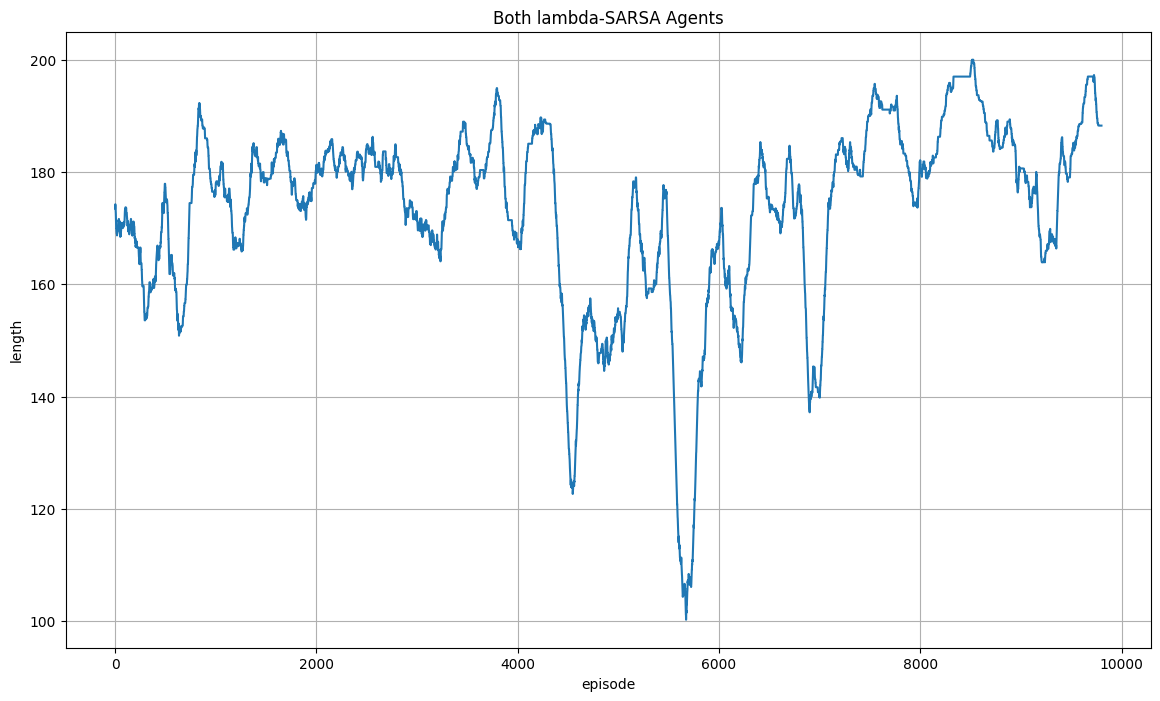

In [11]:
fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(
    moving_average(np.array(episode_lengths), 200),
)

ax.set(xlabel="episode", ylabel="length")
ax.grid()
ax.set_title("Both lambda-SARSA Agents")


plt.show()

In [12]:
base_path = "../.."
prefix = f"{base_path}/persistence/agents/"
filename1 = "lambda_sarsa_agent_1_tagging_world_01"
filename2 = "lambda_sarsa_agent_2_tagging_world_01"

agent_1.dump(f"{prefix}{filename1}")
agent_2.dump(f"{prefix}{filename2}")

This last cell dumps the agents so we can reuse then. You can check what is going by running(you will need to execute the notebook first though, as the agents are not being commited to github):

`python grid_world/visualization/animation_scripts/tag/lambda_sarsa_vs_lambda_sarsa_01.py`

Again it is pretty hard to tell from this plot if the agents are learning anything, so lets do the same tests we did with the SARSA agent.

In [13]:
agent_2.policy.epsilon = 0

episode_lengths_2, agent_1_returns_2, agent_2_returns_2 = train_tag_agents(
    agent_1=agent_1,
    agent_2=agent_2,
    world=gworld,
    episodes=int(1e2),
    episode_max_length=200,
    randomize_starting_positions=False,
)

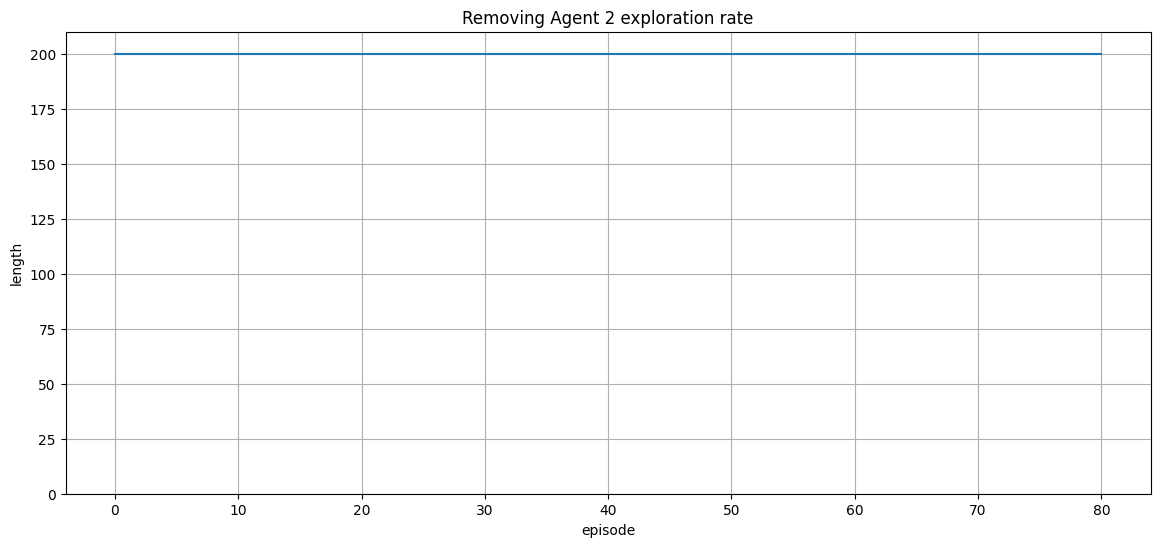

In [14]:
fig, ax = plt.subplots(figsize=(14, 6))

ax.plot(moving_average(np.array(episode_lengths_2), 20))

ax.set(xlabel="episode", ylabel="length", ylim=(0, 210))
ax.grid()
ax.set_title("Removing Agent 2 exploration rate")


plt.show()

In [15]:
episode_lengths_2, agent_1_returns_2, agent_2_returns_2 = train_tag_agents(
    agent_1=agent_1,
    agent_2=random_agent,
    world=gworld,
    episodes=int(1e3),
    episode_max_length=200,
    randomize_starting_positions=False,
)

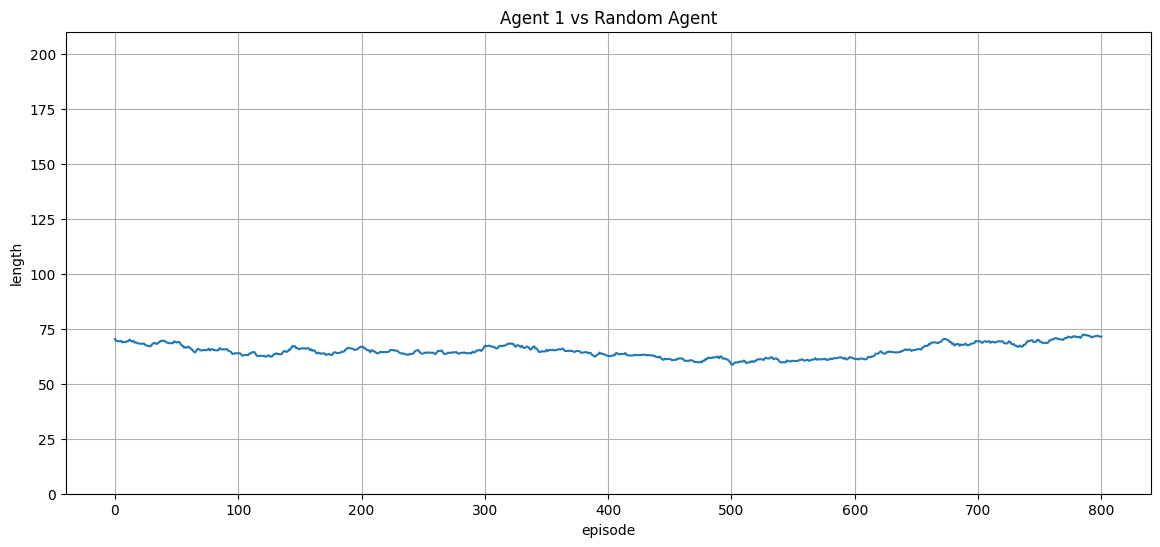

In [16]:
fig, ax = plt.subplots(figsize=(14, 6))

ax.plot(moving_average(np.array(episode_lengths_2), 200))

ax.set(xlabel="episode", ylabel="length", ylim=(0, 210))
ax.grid()
ax.set_title("Agent 1 vs Random Agent")


plt.show()

As expected this is pretty similar to the SARSA agent. However if we compare the numbers it does seem to be learning more efficiently(for the data, computationally it is much slower). Of course this is far from conclusive, as we we trained agents on a single round and did no exploration of the hyperparameters.